# Linear Regression with toy data
##### <div style='text-align:right'>made by Wonbin Kim</div>

기계 학습(Machine Learning)의 정의는 여러가지가 있지만 기계학습이라는 명칭을 만든 아서 사무엘(Arthur Lee Samuel, 1901.12.5~1990.6.29)에 의하면 

> "Machine learning is a subset of artificial intelligence in the field of computer science that often uses statistical techniques to give computers the ability to "learn" (i.e., progressively improve performance on a specific task) with data, without being explicitly programmed"

> 기계 학습은 컴퓨터 공학의 분야 중 하나인 인공 지능의 부분집합으로, 통계적 기술을 이용하여 컴퓨터로 하여금 데이터를 통해 명시적인 프로그래밍 없이 학습(특정한 작업에 대해 성능이 향상되도록)하는 것을 말한다. 

라고 정의 내리고 있다.

기계 학습 (Machine Learning)은 일반적으로 두가지 부류로 나눠져 있다. 

> 첫 번째는 데이터에 대한 Label 또는 Target value가 주어진 경우, 데이터가 주어졌을 때 결과 값이 이러한 Label 또는 Target value로 나타나도록 학습하는 $\textbf{Supervised Learning, 지도 학습}$.


<table width=900>
    <tr>
        <th colspan=2><center> Classification</center> </th> <th colspan=2><center> Regression </center></th>
    </tr>
    <tr>
        <td><img src="image/pic3.png"></td>
        <td><img src="image/pic1.png"></td>
        <td><img src="image/pic4.png"></td>
        <td><img src="image/pic2.png"></td>
    </tr>
    <tr>
     <td colspan=2><left>청색을 클래스로 가지는 데이터와 녹색을 클래스로 가지는 데이터로 모델을 학습했을 때 주황색 데이터는 어떤 색에 속할 것인가? </left></td> <td colspan=2> <left>x축이 데이터이고 y 축이 Target 값일 때 새로운 데이터(주황색)의 y 값은 어떤 값을 가질까?<left></td>
    </tr>
</table>
    


>두 번째는 데이터에 대한 Label 이나 Target value가 전무한 경우, 데이터가 주어졌을 때 결과 값이 어떠한 데이터들의 특성으로 나타나도록 학습하는 $\textbf{Unsupervised Learning, 비지도 학습}$.

<table width=900>
    <tr>
        <th colspan=2><center> Clustering</center> </th> <th colspan=2><center> Anomaly Detection </center></th>
    </tr>
    <tr>
        <td><img src="image/pic5.png"></td>
        <td><img src="image/pic6.png"></td>
        <td><img src="image/pic7.png"></td>
        <td><img src="image/pic8.png"></td>
    </tr>
    <tr>
     <td colspan=2><left>녹색 데이터들을 3개의 집단으로 나눈다면 어떻게 나뉠 것인가? </left></td> <td colspan=2> 녹색 데이터로 학습한 이후 들어온 주황색 데이터는 기존의 데이터들과 유사한 데이터인가? </td>
    </tr>
</table>


## Linear regression (선형 회귀)

> Regression, 회귀란 독립 변수(independent variable)와 종속 변수(dependent variable)의 관계를 찾는 방법론이다. 주어진 입력 변수 x를 통해 목표 변수 y를 예측하는 것이 회귀의 목적이다.
> 
> 선형 회귀는 입력 변수의 기저함수(Basis function)에 대한 선형 함수(Linear function)를 통해 목표 변수와의 관계를 찾는 방법이다.
> 기저 함수를 $\phi$, 선형 회귀의 parameter를 W라고 할 때, 선형 회귀는 다음과 같이 표현한다.

<center>\\(y=\sum_{d=1}^Dw_dx_d=\mathbf{w}^T\phi(\mathbf{x})\\)</center>


In [1]:
import numpy as np
from example import plotting, example1, example2
%matplotlib inline

# Dataset 1. Toy data

Plot하여 관찰하기 수월하도록 x와 y 모두 1차원으로 구성되었다. <br>
함수의 Argument를 True로 주면 b term을 w에 포괄할 수 있도록 데이터 X 각각의 instance에 1이 포함된다. (example.py 함수 참조) 

## Example 1

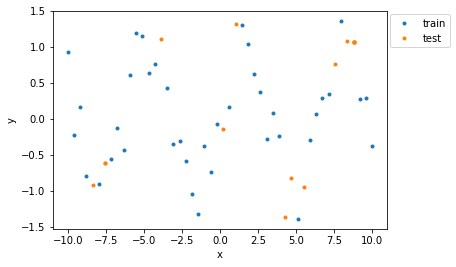

In [2]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example1(True)
plotting([train_X, test_X], [train_Y, test_Y], label=['train', 'test'])

## Example 2

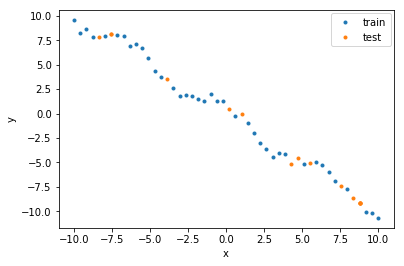

In [3]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example2(False)
plotting([train_X, test_X], [train_Y, test_Y], label=['train', 'test'])

# Linear Squares Method

> 선형 함수의 목표 함수는 다음과 같다.
### <center>\\(\mathcal{J}_{LS}(\mathbf{w})=\frac{1}{2N}\sum_{n=1}^{N}\left(y_n-\mathbf{w}^T\phi(x_n)\right)^2 = \frac{1}{2N}||y-\phi^T\mathbf{w}||^2_2\\)</center> <br>

> 위의 목표 함수는 예측한 결과와 실제 값의 거리를 최소로 하도록하는 w를 요구한다.

<img src='image/pic9.png' width=200px>
>위의 목표 함수에서 우리가 수행해야할 것은 다음과 같다.

### Find <center> \\( \hat{\mathbf{w}}_{LS} = \arg \min\limits_{\mathbf{W}} \frac{1}{2}||y-\phi^T\mathbf{w}||^2_2\\) </center>



where $\phi(x) \in \mathbb{R}^{d\times N}$ , $y \in \mathbb{R}^{k \times N}$, and $\mathbf{w} \in \mathbb{R}^{k\times d}$. N, d, k denote the number of instances, the dimensionality of covariate X, and the dimentionality of response Y, respectively.



### Caution!

For implementational simplicity, X is transposed in practice. i.e. $ x \in \mathbb{R}^{N\times D}$, a row represents a instance.

### 구현 1. 목표 함수 구현해보기.

In [4]:
# Objective function
def ls(x, y, w, b = 0.):
    out = np.square(y-np.dot(x, w)-b)
    if len(out.shape) == 2: 
        out = np.sum(out, axis=1)
    return 0.5*np.mean(out)

In [5]:
def find_w(x, y):
    #1
    x_mtx = np.dot(x.T, x)
    x_inv = np.linalg.inv(x_mtx)
    w_ls = np.dot(np.dot(x_inv, x.T), y)
    #2
    w_ls = np.dot(np.linalg.pinv(x), y)
    return w_ls

## (1) Linear Squared Method - identity basis function

기저 함수로는 입력 변수를 반환하는 identity function을 사용한다. 

### <center> \\( \phi(\mathbf{x}) = \mathbf{x}\\) </center>

In [6]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example1(True)

### 구현 2. w를 구하는 numpy code 구성하고, y의 prediction 값 구하기

## <center>\\(\mathbf{w}_{ML} = \left(X^TX\right)^{-1}X^T\mathbf{y}\\)</center>

> 이 때 $\Phi$는 Design matrix로 다음과 같다. \begin{equation} 
    \Phi =
        \left(
            \begin{matrix}
                \phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_{M-1}(x_1)\\
                \phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_{M-1}(x_1)\\
                \vdots & \vdots & \ddots & \vdots \\
                \phi_0(x_N) & \phi_x(x_N) & \cdots & \phi_{M-1}(x_N)
            \end{matrix}
        \right)
\end{equation}

Hint : np.dot, np.linalg.pinv, np.transpose

In [7]:
w_ls = find_w(train_X, train_Y)
pred_y = np.dot(whole_X, w_ls)

### Result : Loss

In [8]:
print(ls(train_X, train_Y, w_ls))
print(ls(test_X, test_Y, w_ls))

0.24392619694712095
0.4444449066434459


### Plot

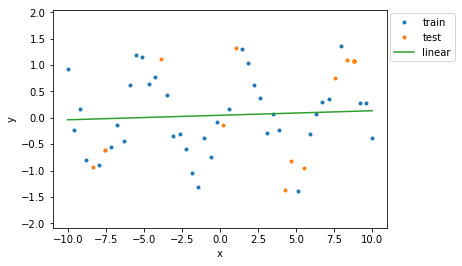

In [9]:
plotting([train_X, test_X, whole_X],
         [train_Y, test_Y, pred_y], label=['train', 'test', 'linear'])

In [10]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example2(True)

In [11]:
w_ls = find_w(train_X, train_Y)
pred_y = np.dot(whole_X, w_ls)

### Result : Loss

In [12]:
print(ls(train_X, train_Y, w_ls))
print(ls(test_X, test_Y, w_ls))

0.3068963137322972
0.1382346040621279


### Plot

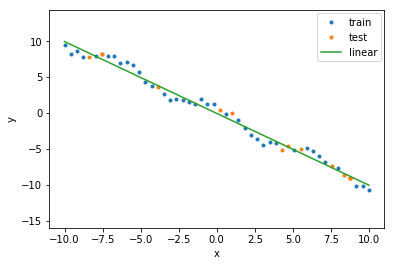

In [13]:
plotting([train_X, test_X, whole_X],
         [train_Y, test_Y, pred_y], label=['train', 'test', 'linear'])

## By Sklearn

앞서 Numpy로 직접 구현하였던 내용을 Scikit-learn library를 통해 간단히 사용할 수 있다.

In [14]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example1(False)

In [15]:
from sklearn import linear_model as lm

lr = lm.LinearRegression()
lr.fit(train_X, train_Y)
pred_y = lr.predict(whole_X)
w_ls = lr.coef_
b_ls = lr.intercept_

### Result : Loss

In [16]:
print(ls(train_X, train_Y, w_ls.T, b_ls)) # 0.11647031231661394
print(ls(test_X, test_Y, w_ls.T, b_ls))   # 0.12986223410131245

0.2439261969471209
0.4444449066434459


### Plot

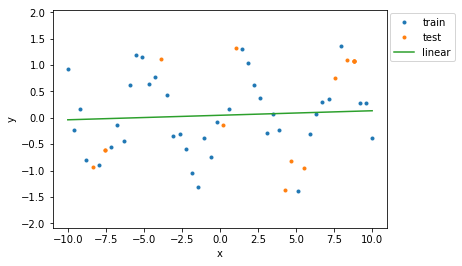

In [17]:
plotting([train_X, test_X, whole_X],
         [train_Y, test_Y, pred_y], label=['train', 'test', 'linear'])

In [18]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example2(False)

In [19]:
from sklearn import linear_model as lm

lr = lm.LinearRegression()
lr.fit(train_X, train_Y)
pred_y = lr.predict(whole_X)
w_ls = lr.coef_
b_ls = lr.intercept_

### Result : Loss

In [20]:
print(ls(train_X, train_Y, w_ls.T, b_ls)) # 0.11647031231661395
print(ls(test_X, test_Y, w_ls.T, b_ls))   # 0.1298622341013125

0.3068963137322973
0.13823460406212854


### Plot

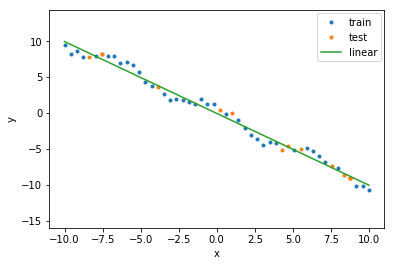

In [21]:
plotting([train_X, test_X, whole_X],
         [train_Y, test_Y, pred_y], label=['train', 'test', 'linear'])